Trước hết, chúng ta chọn center cho từng cluster và tạo dữ liệu cho từng cluster bằng cách lấy mẫu theo phân phối chuẩn có kỳ vọng là center của cluster đó và ma trận hiệp phương sai (covariance matrix) là ma trận đơn vị.

In [1]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

Tiếp theo, ta tạo dữ liệu bằng cách lấy các điểm theo phân phối chuẩn có kỳ vọng tại các điểm có tọa độ (2, 2), (8, 3) và (3, 6), ma trận hiệp phương sai giống nhau và là ma trận đơn vị. Mỗi cluster có 500 điểm. (Chú ý rằng mỗi điểm dữ liệu là một hàng của ma trận dữ liệu).

In [8]:
# Khởi tạo các center, bài toán 3 cluster
means = [[2, 2], [8, 3], [3, 6]]

# Ma trận hiệp phương sai
cov = [[1, 0], [0, 1]]

# Sinh data theo phân phối chuẩn, biết kỳ vọng và độ lệch của mỗi cluster
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

# Gộp thành tập data.
X = np.concatenate((X0, X1, X2), axis = 0)

# Khai báo số cluster
K = 3

# Tạo label tương ứng cho 1500 điểm dữ liệu theo đúng thứ tự đã sinh.
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

In [6]:
print(means)

[[2, 2], [8, 3], [3, 6]]


In [7]:
original_label

array([0, 0, 0, ..., 2, 2, 2])

Chúng ta cần một hàm kmeans_display để hiển thị dữ liệu. Sau đó hiển thị dữ liệu theo nhãn ban đầu.

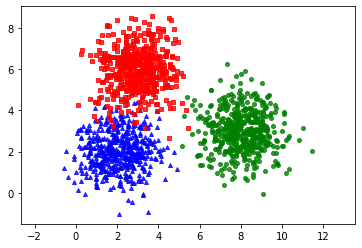

In [9]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

### Các hàm số cần thiết cho K-means clustering
Viết các hàm:

1. ___kmeans_init_centers___ để khởi tạo các centers ban đầu.
2. ___kmeans_asign_labels___ để gán nhán mới cho các điểm khi biết các centers.
3. ___kmeans_update_centers___ để cập nhật các centers mới dữa trên dữ liệu vừa được gán nhãn.
4. ___has_converged___ để kiểm tra điều kiện dừng của thuật toán.

In [10]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

Phần chính của K-means clustering:

In [11]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

Áp dụng thuật toán vừa viết vào dữ liệu ban đầu, hiển thị kết quả cuối cùng.

Centers found by our algorithm:
[[2.9940333  6.00975622]
 [2.05411041 2.07895849]
 [8.01802292 2.99780722]]


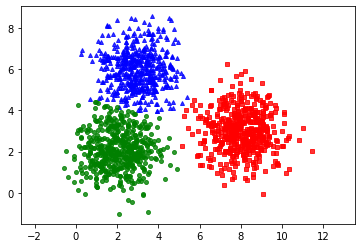

In [12]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1])

## Sử dụng thư viện scikit-learn

Centers found by scikit-learn:
[[8.01802292 2.99780722]
 [2.05411041 2.07895849]
 [2.9940333  6.00975622]]


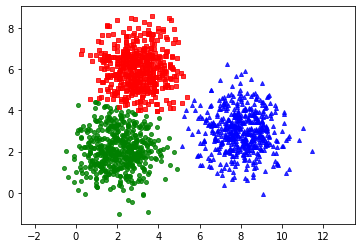

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)